In [300]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback
from sklearn.model_selection import train_test_split
from face_features import create_FaceFeatures

In [315]:
wandb.init(project="actors_classification")

accuracy,▁▂▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇█▇████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,██▇▆▅▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,1.0
epoch,149
loss,0.02442


wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [302]:
face_folders_path = ["pezhman_jamshidi", "behnosh_tabatabei", "Golshifteh_Farahani", "parsa_pirozfar"]
create_FaceFeatures(face_folders_path)

100%|██████████| 54/54 [00:11<00:00,  4.64it/s]


In [303]:
data = pd.read_csv("FaceFeatures.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,pezhman_jamshidi,-0.286591,0.660288,-0.158914,-0.432501,-0.028460,0.307886,-0.079241,-0.176694,0.054402,...,-1.048308,0.117746,0.473464,-0.737842,0.319790,-0.388995,-0.035990,0.000837,-3.948393e-01,-1.259605
1,pezhman_jamshidi,-0.002693,-0.119930,-0.072740,0.058870,-0.125557,0.021472,0.094410,-0.009586,-0.174662,...,-0.184983,-0.058797,0.032070,0.052264,0.285303,0.005907,-0.106605,-0.024422,6.333840e-02,-0.146956
2,pezhman_jamshidi,-0.044753,0.305361,-0.021155,-0.041216,-0.225892,0.275694,0.151403,-0.022977,-0.026036,...,-0.401451,0.167239,0.018569,-0.038476,-0.001218,0.045305,-0.089374,-0.023997,2.182834e-02,-0.179531
3,pezhman_jamshidi,-0.280349,0.565518,-0.203952,-0.456724,-0.022331,0.377768,-0.143302,-0.103409,-0.017181,...,-1.229651,0.242043,0.436608,-0.763917,0.435238,-0.292057,-0.021628,0.058926,-4.746403e-01,-1.146207
4,pezhman_jamshidi,-0.322480,0.924192,-0.226081,-0.705730,-0.068783,0.462703,-0.261494,-0.132286,-0.016097,...,-1.617778,0.360246,0.522500,-1.054100,0.414754,-0.432683,-0.042040,0.045085,-4.932705e-01,-1.521108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,parsa_pirozfar,0.104194,0.353906,-0.045549,-0.275057,0.133867,0.072980,-0.049449,0.032951,0.201069,...,0.054794,0.576328,-0.153197,-0.067814,-0.135540,0.015273,0.027725,0.062524,6.247296e-02,0.147085
176,parsa_pirozfar,-0.345089,0.897888,-0.271182,-0.580523,-0.085821,0.476722,-0.190755,-0.101353,-0.057764,...,-1.489817,0.221170,0.693253,-1.049710,0.465724,-0.397086,-0.098636,0.084051,-5.404941e-01,-1.693052
177,parsa_pirozfar,-0.303771,0.659261,-0.237314,-0.538999,-0.034628,0.494026,-0.169166,-0.081168,-0.009632,...,-1.374039,0.280655,0.579324,-0.921438,0.476433,-0.356982,-0.102988,0.083187,-5.763821e-01,-1.416769
178,parsa_pirozfar,0.052706,0.068925,-0.019370,0.023254,-0.175986,-0.128753,0.036056,0.105680,0.025595,...,0.077960,0.266547,-0.010719,-0.172719,-0.210727,0.081229,0.298589,0.221437,5.597249e-07,0.019134


In [304]:
data = data.replace(["pezhman_jamshidi", "behnosh_tabatabei", "Golshifteh_Farahani", "parsa_pirozfar"],
                    [0, 1, 2, 3])
data

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,0,-0.286591,0.660288,-0.158914,-0.432501,-0.028460,0.307886,-0.079241,-0.176694,0.054402,...,-1.048308,0.117746,0.473464,-0.737842,0.319790,-0.388995,-0.035990,0.000837,-3.948393e-01,-1.259605
1,0,-0.002693,-0.119930,-0.072740,0.058870,-0.125557,0.021472,0.094410,-0.009586,-0.174662,...,-0.184983,-0.058797,0.032070,0.052264,0.285303,0.005907,-0.106605,-0.024422,6.333840e-02,-0.146956
2,0,-0.044753,0.305361,-0.021155,-0.041216,-0.225892,0.275694,0.151403,-0.022977,-0.026036,...,-0.401451,0.167239,0.018569,-0.038476,-0.001218,0.045305,-0.089374,-0.023997,2.182834e-02,-0.179531
3,0,-0.280349,0.565518,-0.203952,-0.456724,-0.022331,0.377768,-0.143302,-0.103409,-0.017181,...,-1.229651,0.242043,0.436608,-0.763917,0.435238,-0.292057,-0.021628,0.058926,-4.746403e-01,-1.146207
4,0,-0.322480,0.924192,-0.226081,-0.705730,-0.068783,0.462703,-0.261494,-0.132286,-0.016097,...,-1.617778,0.360246,0.522500,-1.054100,0.414754,-0.432683,-0.042040,0.045085,-4.932705e-01,-1.521108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3,0.104194,0.353906,-0.045549,-0.275057,0.133867,0.072980,-0.049449,0.032951,0.201069,...,0.054794,0.576328,-0.153197,-0.067814,-0.135540,0.015273,0.027725,0.062524,6.247296e-02,0.147085
176,3,-0.345089,0.897888,-0.271182,-0.580523,-0.085821,0.476722,-0.190755,-0.101353,-0.057764,...,-1.489817,0.221170,0.693253,-1.049710,0.465724,-0.397086,-0.098636,0.084051,-5.404941e-01,-1.693052
177,3,-0.303771,0.659261,-0.237314,-0.538999,-0.034628,0.494026,-0.169166,-0.081168,-0.009632,...,-1.374039,0.280655,0.579324,-0.921438,0.476433,-0.356982,-0.102988,0.083187,-5.763821e-01,-1.416769
178,3,0.052706,0.068925,-0.019370,0.023254,-0.175986,-0.128753,0.036056,0.105680,0.025595,...,0.077960,0.266547,-0.010719,-0.172719,-0.210727,0.081229,0.298589,0.221437,5.597249e-07,0.019134


In [305]:
X = data.iloc[:, 1:].values
X.shape

(180, 512)

In [306]:
Y = data.iloc[:, 0].values
Y = Y.reshape(-1, 1)
Y.shape

(180, 1)

In [307]:
X_train, X_Test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

### Model

In [308]:
model = tf.keras.models.Sequential([
    Dense(512, input_dim=512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(4, activation="softmax")
])

In [309]:
config = wandb.config
config.learning_rate = 0.0001

In [310]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [311]:
MLP_output = model.fit(X_train, Y_train, epochs=150, callbacks=[WandbCallback()])

Epoch 1/150
5/5 [==============================] - 0s 2ms/step - loss: 1.3458 - accuracy: 0.3125
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 1.2957 - accuracy: 0.5000
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 1.2565 - accuracy: 0.5208
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 1.2219 - accuracy: 0.5625
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 1.1787 - accuracy: 0.6111
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 1.1367 - accuracy: 0.6667
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 1.0873 - accuracy: 0.7083
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 1.0433 - accuracy: 0.7014
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.9954 - accuracy: 0.7153
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.9443 - accuracy: 0.7708
Epoch 11/150
5/5 [===========

In [312]:
MLP_loss, MLP_accuracy = MLP_output.history["loss"], MLP_output.history["accuracy"]

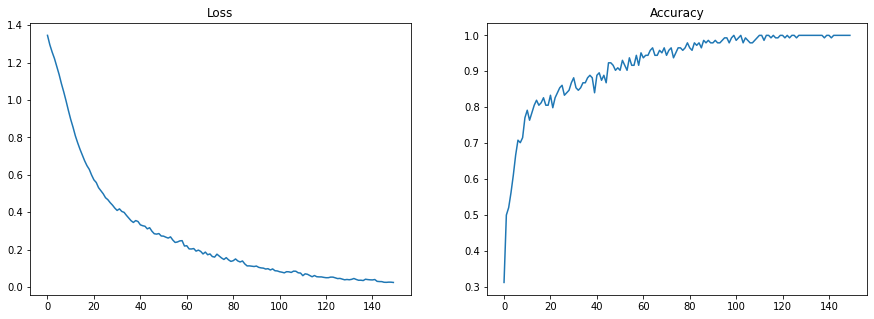

In [313]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(MLP_loss)
ax1.set_title("Loss")
ax2.plot(MLP_accuracy)
ax2.set_title("Accuracy")
plt.show()

In [314]:
model.evaluate(X_Test, Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.8889


[0.29387080669403076, 0.8888888955116272]